[('North Shore', 20.0), ('South Shore', 20.0), ('Strip District', 20.0), ('West End', 20.0), ('Point Breeze North', 19.82973149967256), ('Point Breeze', 19.58727001491795), ('Squirrel Hill North', 19.559519475791774), ('Squirrel Hill South', 19.4679326406306), ('Shadyside', 19.43913320586361), ('Regent Square', 19.43152454780362), ('Central Business District', 19.343474779823858), ('Chateau', nan), ('Highland Park', 19.59349593495935), ('Mt. Oliver', 19.31758530183727), ('Troy Hill', 19.231590181430096), ('South Side Flats', 19.150374125030172), ('Greenfield', 19.089790897908976), ('Fairywood', 19.07654921020656), ('Esplen', 18.97872340425532), ('Bloomfield', 18.958049371497804), ('East Carnegie', 18.925831202046034), ('Hays', 18.844765342960287), ('Banksville', 18.836104513064132), ('Windgap', 18.830409356725145), ('Duquesne Heights', 18.73015873015873), ('Bon Air', 18.689075630252102), ('Upper Hill', 18.623242042931164), ('Polish Hill', 18.562874251497007), ('South Side Slopes', 18.5

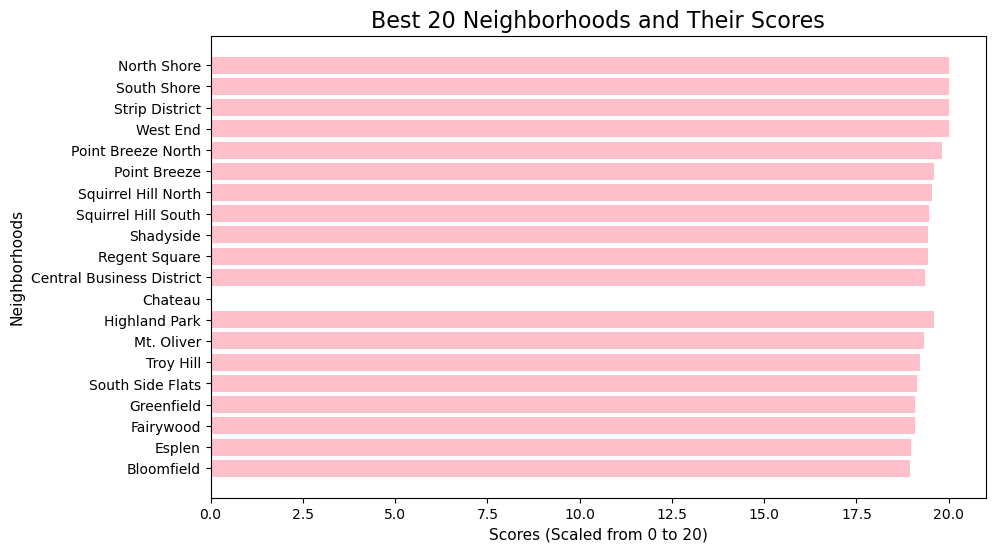

                 Neighborhood      avgRent  scaledRent  totalUnits
6           Bedford Dwellings   251.785714   33.118738       630.0
4           Arlington Heights   276.204819   32.451368       166.0
35                 Glen Hazel   334.251969   30.864949       254.0
58          Northview Heights   356.311275   30.262072       408.0
41             Homewood South   357.007299   30.243050       685.0
..                        ...          ...         ...         ...
71                South Shore  1162.500000    8.229068         8.0
16  Central Business District  1234.026297    6.274266      1407.0
67                  Ridgemont  1237.500000    6.179331        26.0
57                North Shore  1424.436090    1.070398       133.0
80             Strip District  1463.602015    0.000000       397.0

[90 rows x 4 columns]
('Bedford Dwellings', 33.118738244803126)


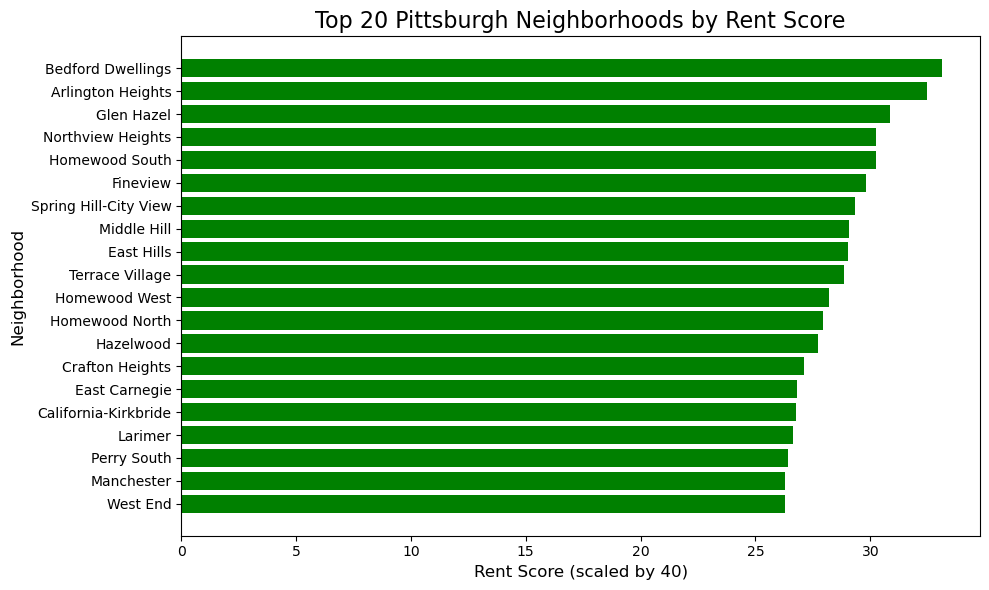

[('Swisshelm Park', 39.103808812546674), ('Chartiers City', 38.78048780487805), ('Stanton Heights', 38.735035012423765), ('Summer Hill', 38.59719438877755), ('Morningside', 38.523985239852394), ('Highland Park', 38.36407377706495), ('Friendship', 38.26795720835456), ('New Homestead', 38.25517993456925), ('Duquesne Heights', 38.24780976220275), ('Regent Square', 38.14624098867147), ('Banksville', 38.11000726920281), ('Point Breeze', 38.09274495138369), ('Oakwood', 38.048780487804876), ('Ridgemont', 37.94871794871795), ('Westwood', 37.8391356542617), ('Lower Lawrenceville', 37.65240439227565), ('Windgap', 37.470238095238095), ('Spring Garden', 37.45547073791349), ('Fairywood', 37.43589743589744), ('Lincoln Place', 37.40095087163233), ('Perry North', 37.17935071846727), ('Squirrel Hill North', 37.087296910514354), ('Upper Lawrenceville', 37.07602339181287), ('Polish Hill', 37.00249791840133), ('Upper Hill', 36.98200812536274), ('Crafton Heights', 36.79919979994999), ('St. Clair', 36.72131

In [6]:


%run FinalEducationNotebook.ipynb #imports each notebook; allows access to all variables (specifcally the final list from each)
#print(modified_final_list)

%run rentDataAnalysis.ipynb # rent notebook, reverse scores later
#print(rentScores)

%run Safety.ipynb # safety notebook
#print(rankings_list)

#list of areas in PGH
neighborhoodNames = set()
#go through each list of neighborhood/score tuples to add all of the used neighborhoods to the list
for listy in [modified_final_list, rentScores, rankings_list]: #each list
    for areaAndSchool in listy:  #each tuple in each list
        if isinstance(areaAndSchool, tuple) and len(areaAndSchool) > 0: # check if has items in it and it is a tuple (if not its missing data)
            neighborhoodNames.add(areaAndSchool[0]) #if so, add it to name of areas
# make it into a list again to get the list methods
neighborhoodNamesList = list(neighborhoodNames)

# list for the final scores after combining metrics
finalNeighborhoodScores = []
for neighborhood in neighborhoodNamesList: #check each list for each neighborhood
                                            #if found in a list, add to total score
    finalScore = 0  # initialize score as 0 (and reset at end of loop)
    for listy in [modified_final_list, rentScores, rankings_list]: #each list
        for item in listy: #each tuple
            if isinstance(item, tuple) and len(item) > 0 and item[0] == neighborhood: #if it matches the neighborhood and is a tuple
                tempScore = item[1]
                if isinstance(tempScore, tuple): #checks in case I messed up and included one of the lists with nested tuples
                    if tempScore[1] >= 0:
                        tempScore = tempScore[1]
                    else:
                        tempScore = 0
                if isinstance(tempScore, (int, float)): #checks that it isn't NaN
                    if tempScore > 0:
                        finalScore += tempScore #score to return
                    else:
                        finalScore += 0
                else:
                    finalScore += 0  #score is "nan" or "NaN"
    finalNeighborhoodScores.append((neighborhood, finalScore)) #add to tor list
#print(finalNeighborhoodScores)












In [26]:
finalNeighborhoodScores.sort(key=lambda x: x[1], reverse=True)
print(finalNeighborhoodScores)

[('Crafton Heights', 82.04951209372335), ('Oakwood', 81.99437525858643), ('Terrace Village', 81.71638005153591), ('Stanton Heights', 81.42465709398644), ('Manchester', 81.35721150043409), ('Chartiers City', 80.98677701069612), ('Fineview', 80.81587124788143), ('Perry South', 79.98869399124487), ('St. Clair', 79.90427557706197), ('Lincoln Place', 79.82279349014372), ('Upper Hill', 79.79601747930337), ('Windgap', 79.62053685757452), ('Lower Lawrenceville', 79.52105118104627), ('Perry North', 79.40342191375132), ('Bedford Dwellings', 79.39348229402789), ('Morningside', 79.38000124508939), ('Polish Hill', 79.36489696297953), ('Hays', 79.05505703326037), ('Beechview', 79.0091816267424), ('Spring Garden', 78.47982924419796), ('Brighton Heights', 78.05946937240597), ('Overbrook', 77.86554571015492), ('Upper Lawrenceville', 77.79712593995367), ('Summer Hill', 77.78958145404135), ('Westwood', 77.4801637845156), ('Friendship', 77.24609039518428), ('Northview Heights', 76.83075491502169), ('East 

The Best Neighborhoods:

1st place: Crafton (82.05)

2nd place: Oakwood (81.99)

3rd place: Terrace Village (81.72)


According to our bestness metric, Crafton Heights is the best neighborhood in Pittsburgh. Based on safety, housing prices, and educational attainment, Crafton, Oakwood, and Terrace Village are the top three areas in the city. 


Sam's response: 

All of the top neighborhoods, best on our bestness measures, ended up being the more suburban areas in PGH. After looking into them, they all seem like nice areas, but I'm not currently interested in living in suburbia, so our bestness measures doesn't reflect my preferences. Going to Pitt, I'm biased towards North Oakland, but my favorite place if probably downtown. There is nowhere in Pittsburgh with more things to do, or places to go while at a walkable distance and close to a bus stop.

Jake's Response:
If I would have taken a guess on which neighborhoods were the best, my money would have been on the suburban neighborhoods. Comming from a suburban town in Georgia I think that they are the best in terms of places to live, and so do our rankings. Coming to school in the city and getting that experience has not changed my mind either. I am pleased with our project's performance and think our metrics and rankings did a great job in determining the best neighborhoods in Pittsburgh. 

AJ's response:

The neighborhoods that were deemed best using our metrics have little going on around them. While they have practical benifits-such as affordability and safety-they don't align with my favorite, North Shore. I havnt explored a lot of Pittsburgh but North Shore is one of the more pivitol neightborhoods in pittsburgh with the Acrisure stadium and easy access to restrants and meauseums. All of these factors contribute to North Shore being the best neightborhood in Pittsburgh. The neighborhoods calculated as best lack vibrancy and activity that I value.
